# Class Single Recording Code

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [ ]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 2\Synapse\Tanks\8_30-9_12_P2C2_RTC-240830-043846\n5-240830-064551"
# behavior_csv_path = r"C:\Users\alber\Downloads\nn6-250113-121205 1.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
tdt_data_obj = TDTData(tdt_data, single_recording_path)

Found Synapse note file: D:\Cohort 3\Pinch Test\n6-250113-121205\Notes.txt
read from t=0s to t=475.34s


In [4]:
tdt_data_obj.remove_initial_LED_artifact(t=30)
# tdt_data_obj.remove_final_data_segment(t = 10)
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*1)
tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels()
tdt_data_obj.compute_dFF()

tdt_data_obj.extract_manual_annotation_behaviors(behavior_csv_path)
tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
tdt_data_obj.remove_short_behaviors(behavior_name='all', min_duration=0.5)

# tdt_data_obj.compute_zscore(method = 'standard')
tdt_data_obj.compute_zscore(method = 'baseline', baseline_start=225, baseline_end = 227.267)
tdt_data_obj.verify_signal()

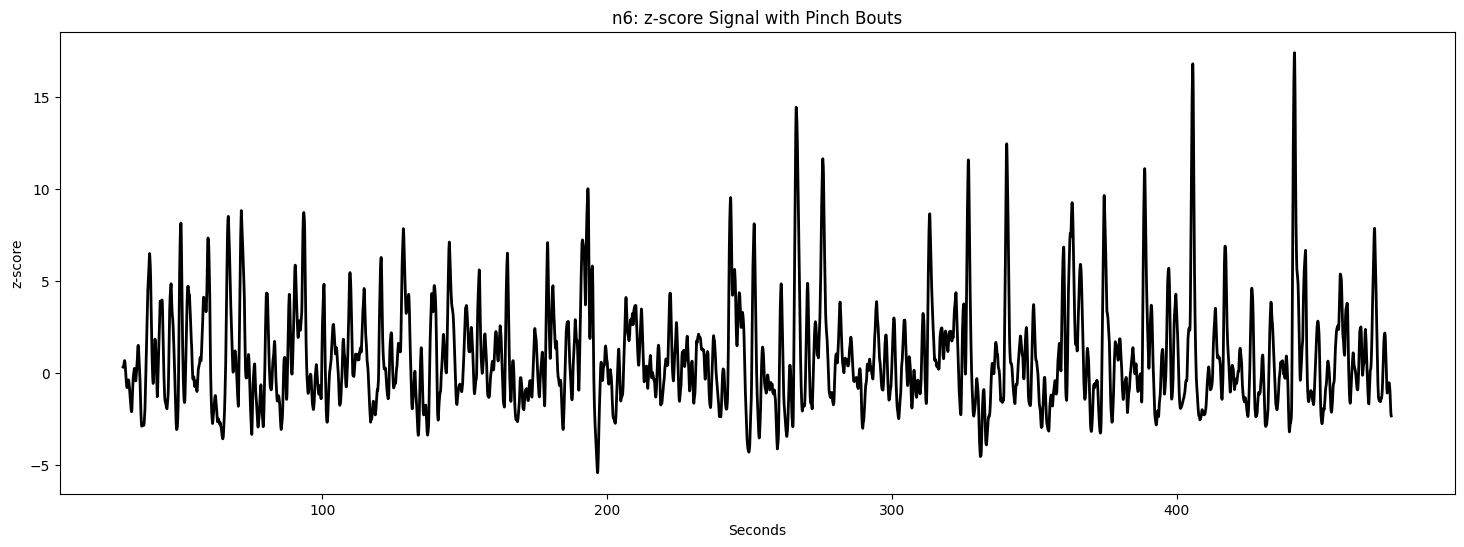

In [ ]:
tdt_data_obj.plot_behavior_event(behavior_name='Pinch', plot_type='dFF')

In [6]:
tdt_data_obj.behaviors

{'Pinch': name:	'Pinch'
 onset:	[]
 offset:	[]
 type_str:	'epocs'
 data:	[1, 1, 1]
 Total_Duration:	[]}

ValueError: Behavior event 'Investigation' not found in behaviors.

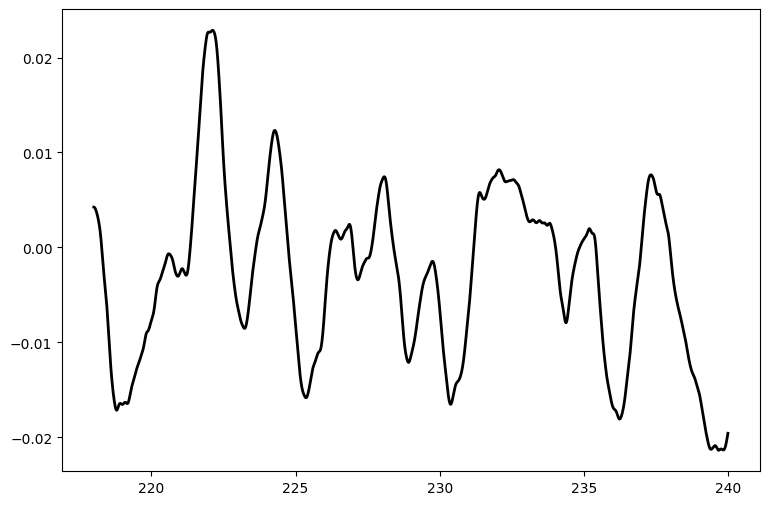

In [7]:
tdt_data_obj.plot_behavior_event_section(behavior_name='Investigation', plot_type='dFF',start_time=218,end_time= 240)

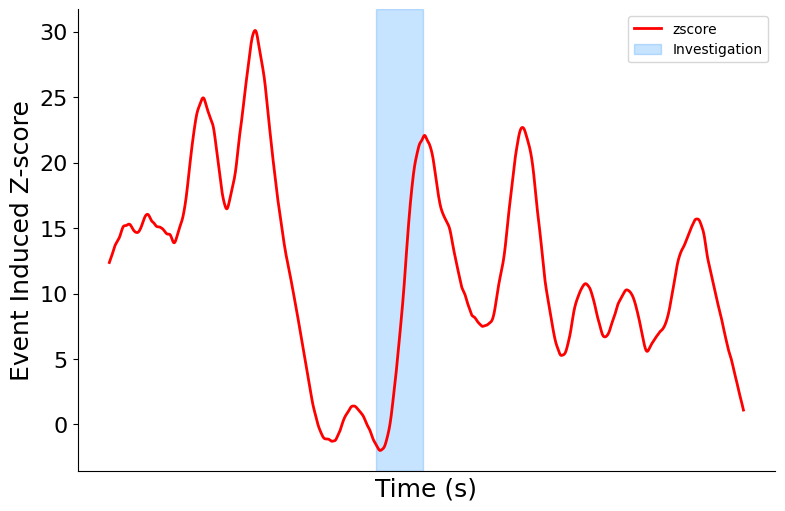

In [ ]:
tdt_data_obj.plot_behavior_event_section(behavior_name='Investigation', plot_type='zscore',start_time=218,end_time= 240)

## Plot Raw Trace

In [10]:
len(tdt_data_obj.streams['DA'])

1569866

In [11]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

1569866

In [12]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

1539348

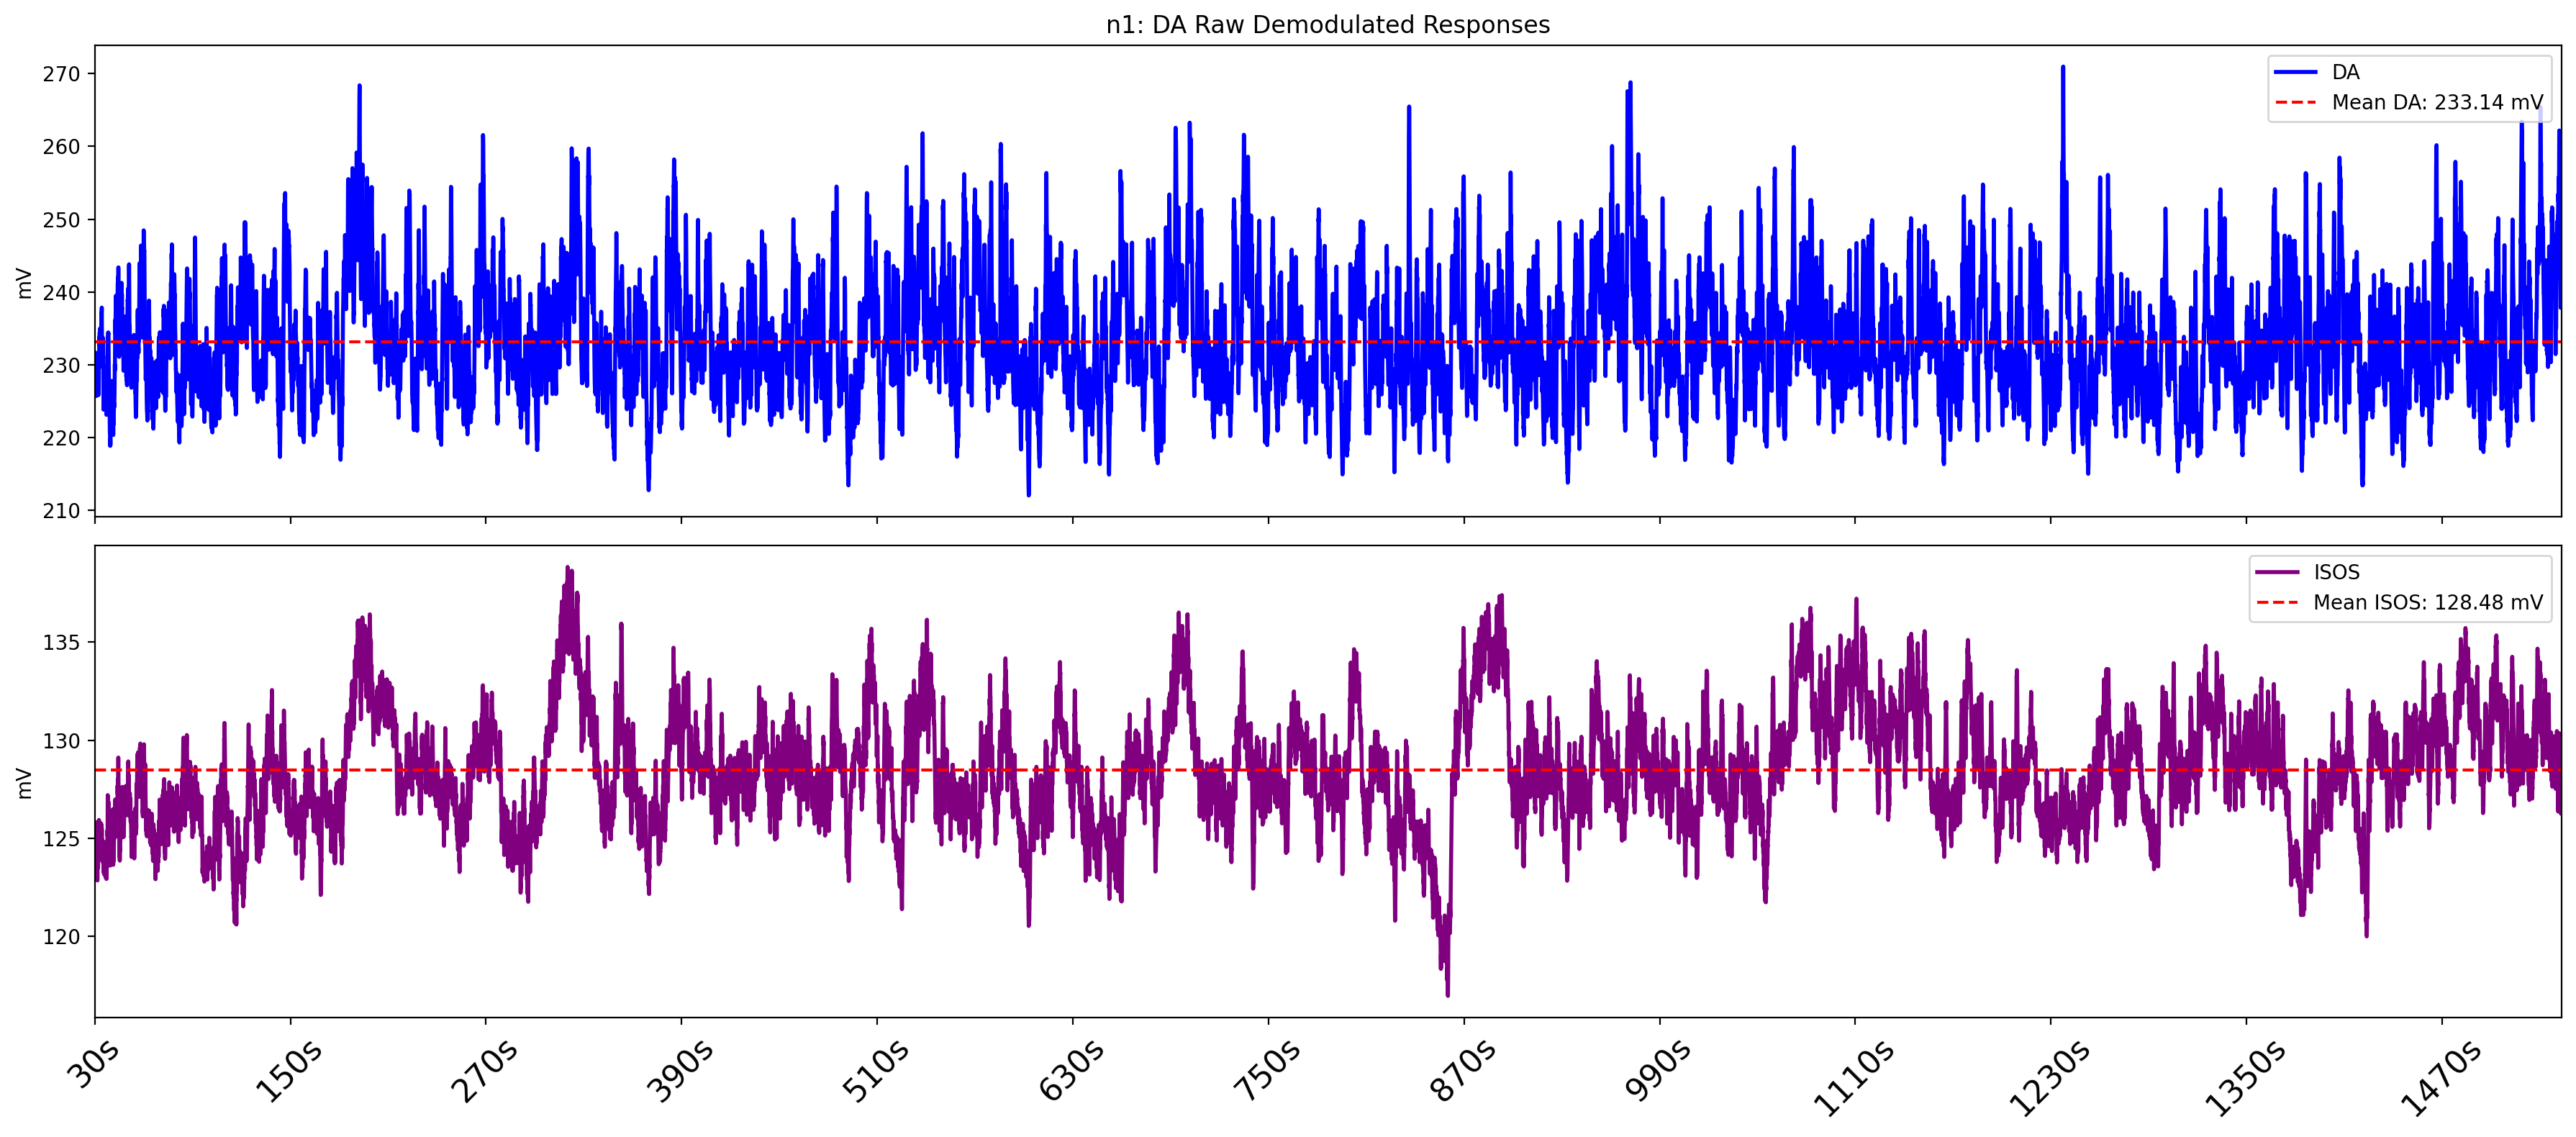

In [ ]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [14]:
# tdt_data_obj.perform_standardization()

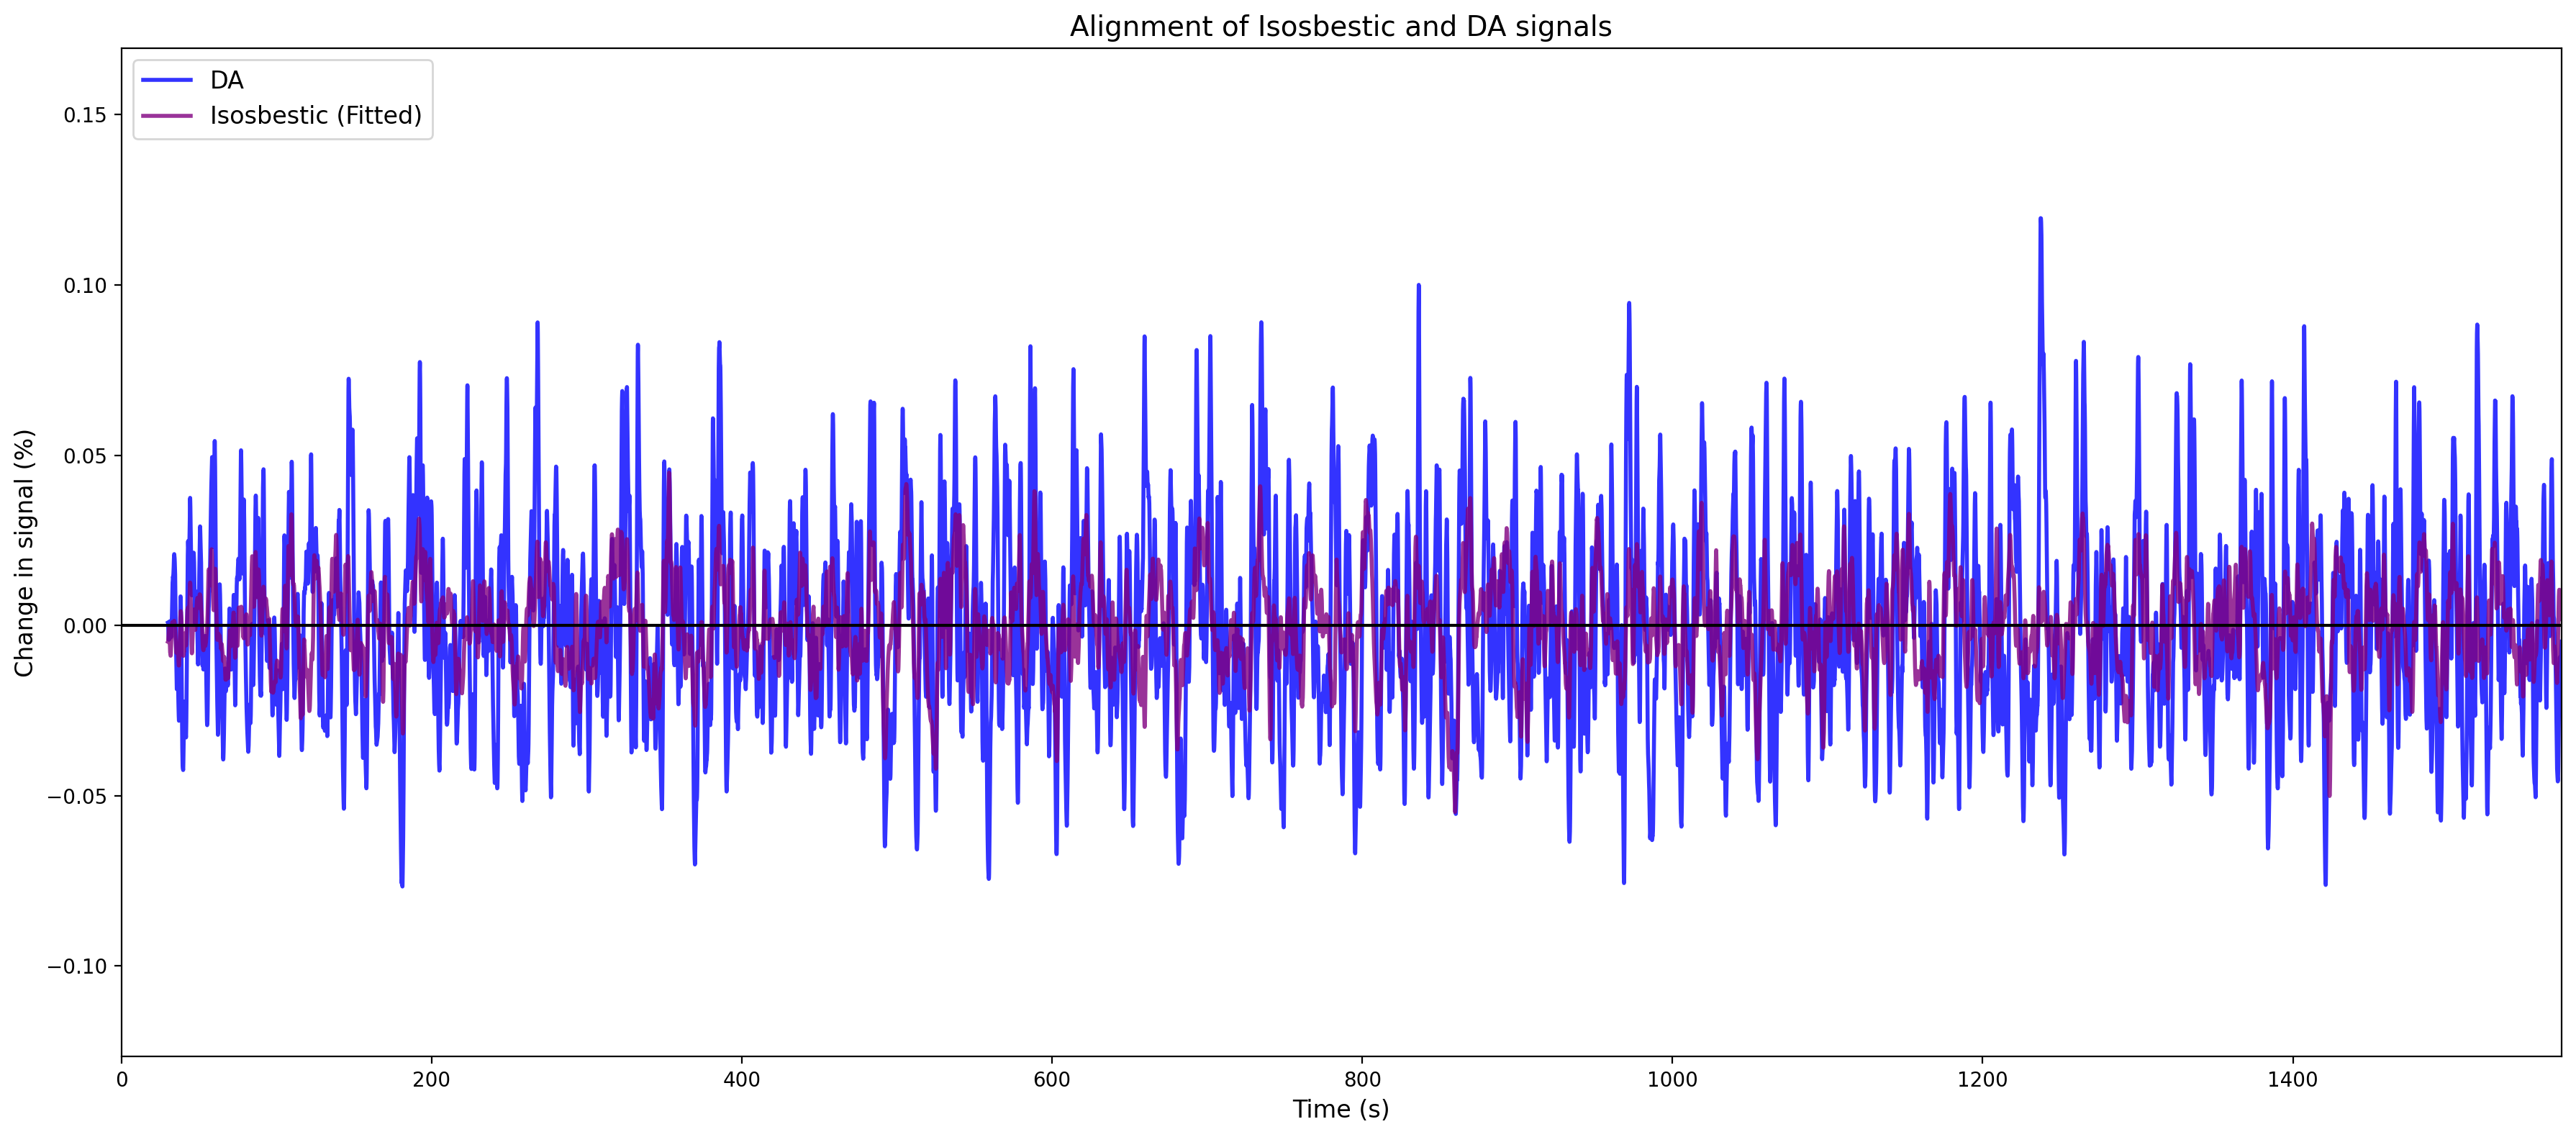

In [ ]:
tdt_data_obj.plot_aligned_signals()

In [ ]:
tdt_data_obj.plot_dFF()

ValueError: dF/F not computed. Please run compute_dFF() before plotting.

In [ ]:
tdt_data_obj.compute_zscore()

In [ ]:
tdt_data_obj.plot_zscore()

## PETH

In [ ]:
tdt_data_obj.plot_behavior_event(behavior_name='Investigation', plot_type='dFF')

In [ ]:
tdt_data_obj.compute_first_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.05)

In [ ]:
tdt_data_obj.plot_first_event_peth(signal_type='zscore')

In [ ]:
tdt_data_obj.compute_1st_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.1)

In [ ]:
tdt_data_obj.plot_1st_event_peth(signal_type='zscore')

Old method

In [ ]:
# # Downsample the data
# # tdt_data_obj.downsample_data(N = 16)

# # Compute dFF
# tdt_data_obj.compute_dff()
# tdt_data_obj.plot_signal('dFF')
# tdt_data_obj.compute_zscore()
# tdt_data_obj.print_behaviors()

## Mean DA during first of each behavior

In [ ]:
# tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.smooth_signal()
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# # tdt_data_obj.hc_get_first_behavior()
# tdt_data_obj.bout_dict